Computing Confidence Intervals Using the WS-R Confidence Sequence

In [1]:
import csv
from csv import DictReader
import pandas as pd
import numpy as np
from scipy.stats import betabinom
import matplotlib.pyplot as plt
import WSR_conf_seq_module
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load one of the 9 document orderings into a pandas dataframe
doc_collection = pd.read_csv('ICAIL_ordering_regions_MEX_4-0_relevance(md5).csv')
Topic = 'regions_MEX'
doc_collection[Topic] = doc_collection[Topic].astype(str)
doc_collection

,Index,regions_MEX,Scores,PRNs
0,70661,True,3.659249,1a11a7f52e96ec2753d7248c0dc98bee
1,96571,True,6.283136,241833224f4d6280f3412359994bbf87
2,140164,True,6.181493,1f6b5990d261985289deb6a233663769
3,68049,True,5.811769,675c3fc628ce4fb7874fd9360b18a63e
4,97780,True,5.697700,d71a2fd032bd1f1c92ed3d3ac2c68f4f
...,...,...,...,...
160877,53210,False,-6.611165,441d3f5d817897808b3be706cc1ca0d9
160878,125695,False,-6.619656,4cc2fb82fd459b62e4666bf0fa5ebfa6
160879,70853,False,-6.621831,d1cb3e211406739d2fd344f37769938f
160880,31070,False,-6.762472,3b65eb33bf4353dc5996dd49dbea1eff


In [3]:
#drop the old indexes from original doc ordering
doc_collection = doc_collection.drop(columns=['Index'])
doc_collection

,regions_MEX,Scores,PRNs
0,True,3.659249,1a11a7f52e96ec2753d7248c0dc98bee
1,True,6.283136,241833224f4d6280f3412359994bbf87
2,True,6.181493,1f6b5990d261985289deb6a233663769
3,True,5.811769,675c3fc628ce4fb7874fd9360b18a63e
4,True,5.697700,d71a2fd032bd1f1c92ed3d3ac2c68f4f
...,...,...,...
160877,False,-6.611165,441d3f5d817897808b3be706cc1ca0d9
160878,False,-6.619656,4cc2fb82fd459b62e4666bf0fa5ebfa6
160879,False,-6.621831,d1cb3e211406739d2fd344f37769938f
160880,False,-6.762472,3b65eb33bf4353dc5996dd49dbea1eff


**Calculate N values for the document collection**

In [4]:
#total documents in the document collection
N = len(doc_collection)
N

160882

In [5]:
#the number of relevant documents in the collection
N_plus = WSR_conf_seq_module.calculate_N_plus(doc_collection, Topic)
N_plus

2099

In [6]:
#the number of non-relevant documents in the collection
N_minus = WSR_conf_seq_module.calculate_N_minus(doc_collection, Topic)
N_minus

158783

**Calculate Z values for document collection**

In [7]:
#smallest the number of documents reviewed to reach 80% recall
Z = WSR_conf_seq_module.get_Z_value(doc_collection, Topic, N_plus)
Z

1864

In [8]:
doc_collection.iloc[:Z][doc_collection[Topic]=='True']

,regions_MEX,Scores,PRNs
0,True,3.659249,1a11a7f52e96ec2753d7248c0dc98bee
1,True,6.283136,241833224f4d6280f3412359994bbf87
2,True,6.181493,1f6b5990d261985289deb6a233663769
3,True,5.811769,675c3fc628ce4fb7874fd9360b18a63e
4,True,5.697700,d71a2fd032bd1f1c92ed3d3ac2c68f4f
...,...,...,...
1854,True,1.337290,f894b8029cccdcfa90197441591a8093
1856,True,1.319787,bf6b4dfc24a4bf8daa6562e6f7198a5c
1858,True,1.288746,51f09929fb0b488d0708e12cfe6c6f80
1859,True,1.280983,0be143b4c8fd3e804fa60b11768f6d44


In [9]:
#number of reviewed docs that are relevant
Z_plus = WSR_conf_seq_module.get_Zplus_value(doc_collection, Z, Topic)
Z_plus

1679

In [10]:
#number of reviewed docs that are nonrelevant
Z_minus = WSR_conf_seq_module.get_Zminus_value(doc_collection, Z, Topic)
Z_minus

185

In [11]:
#number of unreviewed docs in the collection
Z_0 = WSR_conf_seq_module.get_Z0(doc_collection, Z, Topic)
Z_0

159018

In [12]:
#pandas dataframe listing unreviewed docs and their relevance determinations
Z_0_list = doc_collection[Z:]
Z_0_list

,regions_MEX,Scores,PRNs
1864,True,1.239936,b559a556a135c5a157dd69e0114c7ba7
1865,False,1.237670,a4eecfb99f097270209aba6e7429bbff
1866,False,1.219686,b4e52dd4fcf0a87da832d2412de53bbd
1867,True,1.213704,ff2ed1395b03562adc9b25db140b875c
1868,False,1.208748,4a8cc5c8e458ac07f051a4d169f83272
...,...,...,...
160877,False,-6.611165,441d3f5d817897808b3be706cc1ca0d9
160878,False,-6.619656,4cc2fb82fd459b62e4666bf0fa5ebfa6
160879,False,-6.621831,d1cb3e211406739d2fd344f37769938f
160880,False,-6.762472,3b65eb33bf4353dc5996dd49dbea1eff


In [13]:
#number of unreviewed docs that are relevant
Z_0_plus = WSR_conf_seq_module.get_Z0plus_value(Z_0_list, Z, Topic)
Z_0_plus

420

In [14]:
#number of unreviewed docs are are nonrelevant
Z_0_minus = WSR_conf_seq_module.get_Z0minus_value(Z_0_list, Z, Topic)
Z_0_minus

158598

**Verify that Z0 + Z_plus + Z_minus = N(160882)**

In [15]:
Z_plus + Z_minus + Z_0

160882

**Verify that Z_0_plus + Z_0_minus = Z_0**

In [16]:
Z_0_plus + Z_0_minus

159018

**Generate samples for the WSR confidence intervals**

In [17]:
#sorting the collection by the PRN value
PRN_permutation = doc_collection.sort_values(by = ['PRNs'], axis = 0)
PRN_permutation

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
96848,False,-2.527787,fffdb6cd73541a6de46778acfe6eb857
96692,False,-2.524914,fffe0a86f7b1265375b2feb5096dcf86
133815,False,-3.394372,ffff61684a3d561ce1f38139eeeef0ae
153542,False,-4.196027,ffff84f3b6d0d7bb1f0fd098e9f5cbc8


In [18]:
prefix100 = WSR_conf_seq_module.generate_prefix_for_budget(PRN_permutation, 100, Z)
prefix100

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
132441,False,-3.355815,002363afb912eaf9baa378c89a125f67
25040,False,-1.171436,0024382f1f910bbeff420e994c5cf4ad
156688,False,-4.460246,002456a02852da784f68747e7c51bf8f
81542,False,-2.224892,00245aec402d07ac3cc953d4bd20c5d6


In [19]:
prefix400 = WSR_conf_seq_module.generate_prefix_for_budget(PRN_permutation, 400, Z)
prefix400

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
140970,False,-3.613638,009a4fb7229618f7d1c98945c47da717
27182,False,-1.219015,009a52e76bcc356b3cb69210baf85133
44417,False,-1.541838,009a8b358486c660414f3516998d2e01
15895,False,-0.940124,009a91adc398caee6503e5e2a59e01f9


In [20]:
prefix1600 = WSR_conf_seq_module.generate_prefix_for_budget(PRN_permutation, 1600, Z)
prefix1600

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
86654,False,-2.326002,027999f589a5fedcc79596d0bf9017a9
21422,False,-1.089395,0279da937ef9cd7d9a9b9f703ae3dd45
138359,False,-3.528538,0279e365c1d9db7d689363b1ea701db5
141736,False,-3.638677,027a13b08b9cc5658ea2bcaf8d811f4e


In [21]:
prefix6400 = WSR_conf_seq_module.generate_prefix_for_budget(PRN_permutation, 6400, Z)
prefix6400

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
96931,False,-2.529189,0a40dbc2c0ba365d1322a52f9566c9e4
8840,False,-0.676514,0a41170b8920a4bd19f4b12ebf6690a9
73175,False,-2.064951,0a421bce2bd91d8d6824e5c31c60ec00
18268,False,-1.007702,0a42c6eec322e8fe39d630ccff0abf92


In [22]:
prefix25600 = WSR_conf_seq_module.generate_prefix_for_budget(PRN_permutation, 25600, Z)
prefix25600

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
99051,False,-2.573027,2953c72b81258cd80a99c940c4073b3f
8472,False,-0.658051,2953e1d5e744b98eb400146e25e64521
156219,False,-4.414428,295440b7894722527b7469a3c35740ea
52412,False,-1.685407,29545eaacae6fb53a3c0d5d4dd41245b


In [23]:
#generate a list of the 5 samples of sizes 100, 400, 1600, 6400, 25600
prefix_list = [prefix100, prefix400, prefix1600, prefix6400, prefix25600]

**Generate M and G values for each sample**

In [24]:
Samp100mets = WSR_conf_seq_module.compute_M(prefix_list[0], Topic, Z)
Samp100mets

{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0}

In [25]:
Samp400mets = WSR_conf_seq_module.compute_M(prefix_list[1], Topic, Z)
Samp400mets

{'M': 404, 'M_plus': 4, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0}

In [26]:
Samp1600mets = WSR_conf_seq_module.compute_M(prefix_list[2], Topic, Z)
Samp1600mets

{'M': 1619,
 'M_plus': 18,
 'M_minus': 1601,
 'G': 1600,
 'G_minus': 1598,
 'G_plus': 2}

In [27]:
Samp6400mets = WSR_conf_seq_module.compute_M(prefix_list[3], Topic, Z)
Samp6400mets

{'M': 6483,
 'M_plus': 89,
 'M_minus': 6394,
 'G': 6400,
 'G_minus': 6387,
 'G_plus': 13}

In [28]:
Samp25600mets = WSR_conf_seq_module.compute_M(prefix_list[4], Topic, Z)
Samp25600mets

{'M': 25903,
 'M_plus': 344,
 'M_minus': 25559,
 'G': 25600,
 'G_minus': 25534,
 'G_plus': 66}

**Combining the Prior and Posterior Distributions to get the Two-Sided Confidence Interval**

In [29]:

WSR_conf_seq_module.compute_WSR_approx_UOSCI(N, Samp100mets)
WSR_conf_seq_module.prune_conf_intsUOSCI(Samp100mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'conf_upperUOSCI': 4828, 'conf_lowerUOSCI': 0}
{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'conf_upperUOSCI': 4828, 'conf_lowerUOSCI': 1679}


In [30]:

WSR_conf_seq_module.compute_conf_intsTSCI(N, Samp100mets)
WSR_conf_seq_module.prune_conf_intsTSCI(Samp100mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'conf_upperUOSCI': 4828, 'conf_lowerUOSCI': 1679, 'conf_upperTSCI': 11786, 'conf_lowerTSCI': 0}
{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'conf_upperUOSCI': 4828, 'conf_lowerUOSCI': 1679, 'conf_upperTSCI': 11786, 'conf_lowerTSCI': 1679}


In [31]:

WSR_conf_seq_module.compute_WSR_approx_UOSCI(N, Samp400mets)
WSR_conf_seq_module.prune_conf_intsUOSCI(Samp400mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 404, 'M_plus': 4, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'conf_upperUOSCI': 6747, 'conf_lowerUOSCI': 100}
{'M': 404, 'M_plus': 4, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'conf_upperUOSCI': 6747, 'conf_lowerUOSCI': 1679}


In [32]:

WSR_conf_seq_module.compute_conf_intsTSCI(N, Samp400mets)
WSR_conf_seq_module.prune_conf_intsTSCI(Samp400mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 404, 'M_plus': 4, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'conf_upperUOSCI': 6747, 'conf_lowerUOSCI': 1679, 'conf_upperTSCI': 6735, 'conf_lowerTSCI': 101}
{'M': 404, 'M_plus': 4, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'conf_upperUOSCI': 6747, 'conf_lowerUOSCI': 1679, 'conf_upperTSCI': 6735, 'conf_lowerTSCI': 1679}


In [33]:

WSR_conf_seq_module.compute_WSR_approx_UOSCI(N, Samp1600mets)
WSR_conf_seq_module.prune_conf_intsUOSCI(Samp1600mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 1619, 'M_plus': 18, 'M_minus': 1601, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'conf_upperUOSCI': 4031, 'conf_lowerUOSCI': 585}
{'M': 1619, 'M_plus': 18, 'M_minus': 1601, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'conf_upperUOSCI': 4031, 'conf_lowerUOSCI': 1681}


In [34]:

WSR_conf_seq_module.compute_conf_intsTSCI(N, Samp1600mets)
WSR_conf_seq_module.prune_conf_intsTSCI(Samp1600mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 1619, 'M_plus': 18, 'M_minus': 1601, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'conf_upperUOSCI': 4031, 'conf_lowerUOSCI': 1681, 'conf_upperTSCI': 4006, 'conf_lowerTSCI': 592}
{'M': 1619, 'M_plus': 18, 'M_minus': 1601, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'conf_upperUOSCI': 4031, 'conf_lowerUOSCI': 1681, 'conf_upperTSCI': 4006, 'conf_lowerTSCI': 1681}


In [35]:

WSR_conf_seq_module.compute_WSR_approx_UOSCI(N, Samp6400mets)
WSR_conf_seq_module.prune_conf_intsUOSCI(Samp6400mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 6483, 'M_plus': 89, 'M_minus': 6394, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'conf_upperUOSCI': 3319, 'conf_lowerUOSCI': 1380}
{'M': 6483, 'M_plus': 89, 'M_minus': 6394, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'conf_upperUOSCI': 3319, 'conf_lowerUOSCI': 1692}


In [36]:

WSR_conf_seq_module.compute_conf_intsTSCI(N, Samp6400mets)
WSR_conf_seq_module.prune_conf_intsTSCI(Samp6400mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 6483, 'M_plus': 89, 'M_minus': 6394, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'conf_upperUOSCI': 3319, 'conf_lowerUOSCI': 1692, 'conf_upperTSCI': 3294, 'conf_lowerTSCI': 1394}
{'M': 6483, 'M_plus': 89, 'M_minus': 6394, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'conf_upperUOSCI': 3319, 'conf_lowerUOSCI': 1692, 'conf_upperTSCI': 3294, 'conf_lowerTSCI': 1692}


In [37]:

WSR_conf_seq_module.compute_WSR_approx_UOSCI(N, Samp25600mets)
WSR_conf_seq_module.prune_conf_intsUOSCI(Samp25600mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 25903, 'M_plus': 344, 'M_minus': 25559, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'conf_upperUOSCI': 2635, 'conf_lowerUOSCI': 1710}
{'M': 25903, 'M_plus': 344, 'M_minus': 25559, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'conf_upperUOSCI': 2635, 'conf_lowerUOSCI': 1745}


In [38]:

WSR_conf_seq_module.compute_conf_intsTSCI(N, Samp25600mets)
WSR_conf_seq_module.prune_conf_intsTSCI(Samp25600mets, N, Z_minus, Z_plus)

Confidence set is an unbroken interval
{'M': 25903, 'M_plus': 344, 'M_minus': 25559, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'conf_upperUOSCI': 2635, 'conf_lowerUOSCI': 1745, 'conf_upperTSCI': 2626, 'conf_lowerTSCI': 1716}
{'M': 25903, 'M_plus': 344, 'M_minus': 25559, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'conf_upperUOSCI': 2635, 'conf_lowerUOSCI': 1745, 'conf_upperTSCI': 2626, 'conf_lowerTSCI': 1745}


**Compute one-sided confidence interval on recall**

In [39]:
WSR_conf_seq_module.compute_UOSCI_recall(Samp100mets, Z_plus)

0.34776304888152443
1.0


In [40]:
WSR_conf_seq_module.compute_UOSCI_recall(Samp400mets, Z_plus)

0.24885134133689046
1.0


In [41]:
WSR_conf_seq_module.compute_UOSCI_recall(Samp1600mets, Z_plus)

0.41701810965021086
1.0


In [42]:
WSR_conf_seq_module.compute_UOSCI_recall(Samp6400mets, Z_plus)

0.509792106056041
1.0


In [43]:
WSR_conf_seq_module.compute_UOSCI_recall(Samp25600mets, Z_plus)

0.6622390891840607
1.0


**Compute two-sided confidence interval on recall**

In [44]:
WSR_conf_seq_module.compute_TSCI_recall(Samp100mets, Z_plus)

0.14245715255387748
1.0


In [45]:
WSR_conf_seq_module.compute_TSCI_recall(Samp400mets, Z_plus)

0.24929472902746844
1.0


In [46]:
WSR_conf_seq_module.compute_TSCI_recall(Samp1600mets, Z_plus)

0.4196205691462806
1.0


In [47]:
WSR_conf_seq_module.compute_TSCI_recall(Samp6400mets, Z_plus)

0.5136612021857924
1.0


In [48]:
WSR_conf_seq_module.compute_TSCI_recall(Samp25600mets, Z_plus)

0.6645087585681645
1.0


In [49]:
import pprint

In [50]:
pprint.pp(Samp100mets)

{'M': 100,
 'M_plus': 0,
 'M_minus': 100,
 'G': 100,
 'G_minus': 100,
 'G_plus': 0,
 'conf_upperUOSCI': 4828,
 'conf_lowerUOSCI': 1679,
 'conf_upperTSCI': 11786,
 'conf_lowerTSCI': 1679,
 'UOSCI_RECALL-lower': 0.34776304888152443,
 'UOSCI_RECALL-upper': 1.0,
 'TSCI_RECALL-lower': 0.14245715255387748,
 'TSCI_RECALL-upper': 1.0}


In [51]:
pprint.pp(Samp400mets)

{'M': 404,
 'M_plus': 4,
 'M_minus': 400,
 'G': 400,
 'G_minus': 400,
 'G_plus': 0,
 'conf_upperUOSCI': 6747,
 'conf_lowerUOSCI': 1679,
 'conf_upperTSCI': 6735,
 'conf_lowerTSCI': 1679,
 'UOSCI_RECALL-lower': 0.24885134133689046,
 'UOSCI_RECALL-upper': 1.0,
 'TSCI_RECALL-lower': 0.24929472902746844,
 'TSCI_RECALL-upper': 1.0}


In [52]:
pprint.pp(Samp1600mets)

{'M': 1619,
 'M_plus': 18,
 'M_minus': 1601,
 'G': 1600,
 'G_minus': 1598,
 'G_plus': 2,
 'conf_upperUOSCI': 4031,
 'conf_lowerUOSCI': 1681,
 'conf_upperTSCI': 4006,
 'conf_lowerTSCI': 1681,
 'UOSCI_RECALL-lower': 0.41701810965021086,
 'UOSCI_RECALL-upper': 1.0,
 'TSCI_RECALL-lower': 0.4196205691462806,
 'TSCI_RECALL-upper': 1.0}


In [53]:
pprint.pp(Samp6400mets)

{'M': 6483,
 'M_plus': 89,
 'M_minus': 6394,
 'G': 6400,
 'G_minus': 6387,
 'G_plus': 13,
 'conf_upperUOSCI': 3319,
 'conf_lowerUOSCI': 1692,
 'conf_upperTSCI': 3294,
 'conf_lowerTSCI': 1692,
 'UOSCI_RECALL-lower': 0.509792106056041,
 'UOSCI_RECALL-upper': 1.0,
 'TSCI_RECALL-lower': 0.5136612021857924,
 'TSCI_RECALL-upper': 1.0}


In [54]:
pprint.pp(Samp25600mets)

{'M': 25903,
 'M_plus': 344,
 'M_minus': 25559,
 'G': 25600,
 'G_minus': 25534,
 'G_plus': 66,
 'conf_upperUOSCI': 2635,
 'conf_lowerUOSCI': 1745,
 'conf_upperTSCI': 2626,
 'conf_lowerTSCI': 1745,
 'UOSCI_RECALL-lower': 0.6622390891840607,
 'UOSCI_RECALL-upper': 1.0,
 'TSCI_RECALL-lower': 0.6645087585681645,
 'TSCI_RECALL-upper': 1.0}


**Generate samples for the OneShot-URE confidence intervals**

In [55]:
#sorting the collection by the PRN value
PRN_permutation = doc_collection.sort_values(by = ['PRNs'], axis = 0)
PRN_permutation

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
96848,False,-2.527787,fffdb6cd73541a6de46778acfe6eb857
96692,False,-2.524914,fffe0a86f7b1265375b2feb5096dcf86
133815,False,-3.394372,ffff61684a3d561ce1f38139eeeef0ae
153542,False,-4.196027,ffff84f3b6d0d7bb1f0fd098e9f5cbc8


In [56]:
UREsample100 = WSR_conf_seq_module.UREgenerate_sample(PRN_permutation, 100, Z)
UREsample100

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
132441,False,-3.355815,002363afb912eaf9baa378c89a125f67
25040,False,-1.171436,0024382f1f910bbeff420e994c5cf4ad
156688,False,-4.460246,002456a02852da784f68747e7c51bf8f
81542,False,-2.224892,00245aec402d07ac3cc953d4bd20c5d6


In [57]:
UREsample400 = WSR_conf_seq_module.UREgenerate_sample(PRN_permutation, 400, Z)
UREsample400

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
140970,False,-3.613638,009a4fb7229618f7d1c98945c47da717
27182,False,-1.219015,009a52e76bcc356b3cb69210baf85133
44417,False,-1.541838,009a8b358486c660414f3516998d2e01
15895,False,-0.940124,009a91adc398caee6503e5e2a59e01f9


In [58]:
UREsample1600 = WSR_conf_seq_module.UREgenerate_sample(PRN_permutation, 1600, Z)
UREsample1600

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
86654,False,-2.326002,027999f589a5fedcc79596d0bf9017a9
21422,False,-1.089395,0279da937ef9cd7d9a9b9f703ae3dd45
138359,False,-3.528538,0279e365c1d9db7d689363b1ea701db5
141736,False,-3.638677,027a13b08b9cc5658ea2bcaf8d811f4e


In [59]:
UREsample6400 = WSR_conf_seq_module.UREgenerate_sample(PRN_permutation, 6400, Z)
UREsample6400

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
96931,False,-2.529189,0a40dbc2c0ba365d1322a52f9566c9e4
8840,False,-0.676514,0a41170b8920a4bd19f4b12ebf6690a9
73175,False,-2.064951,0a421bce2bd91d8d6824e5c31c60ec00
18268,False,-1.007702,0a42c6eec322e8fe39d630ccff0abf92


In [60]:
UREsample25600 = WSR_conf_seq_module.UREgenerate_sample(PRN_permutation, 25600, Z)
UREsample25600

,regions_MEX,Scores,PRNs
60467,False,-1.828431,000041cd0abd9e197be4074a55b941b9
113365,False,-2.878930,00013ce794661a9693bbb187f3e00a76
10813,False,-0.762829,0001ab3b881ddc7f381df59daf55182c
87164,False,-2.335689,00024ea9d61d1c0337d275b553f2a82f
2736,False,-0.008255,00027775012fc72cba66cab016b7834c
...,...,...,...
99051,False,-2.573027,2953c72b81258cd80a99c940c4073b3f
8472,False,-0.658051,2953e1d5e744b98eb400146e25e64521
156219,False,-4.414428,295440b7894722527b7469a3c35740ea
52412,False,-1.685407,29545eaacae6fb53a3c0d5d4dd41245b


In [63]:
#generate a list of the 5 samples of sizes 100, 400, 1600, 6400, 25600
UREsample_list = [UREsample100, UREsample400, UREsample1600, UREsample6400, UREsample25600]

**Generate M and G values for each sample**

In [64]:
URESamp100mets = WSR_conf_seq_module.UREcompute_M(UREsample_list[0], Topic, Z)
URESamp100mets

99


{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0}

In [65]:
URESamp400mets = WSR_conf_seq_module.UREcompute_M(UREsample_list[1], Topic, Z)
URESamp400mets

399


{'M': 400, 'M_plus': 0, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0}

In [66]:
URESamp1600mets = WSR_conf_seq_module.UREcompute_M(UREsample_list[2], Topic, Z)
URESamp1600mets

1599


{'M': 1600,
 'M_plus': 2,
 'M_minus': 1598,
 'G': 1600,
 'G_minus': 1598,
 'G_plus': 2}

In [67]:
URESamp6400mets = WSR_conf_seq_module.UREcompute_M(UREsample_list[3], Topic, Z)
URESamp6400mets

6399


{'M': 6400,
 'M_plus': 13,
 'M_minus': 6387,
 'G': 6400,
 'G_minus': 6387,
 'G_plus': 13}

In [68]:
URESamp25600mets = WSR_conf_seq_module.UREcompute_M(UREsample_list[4], Topic, Z)
URESamp25600mets

25599


{'M': 25600,
 'M_plus': 66,
 'M_minus': 25534,
 'G': 25600,
 'G_minus': 25534,
 'G_plus': 66}

**Compute the UOSCI for One-Shot URE using Hypergeometric Distribution**

**Compute one-sided confidence interval on Z0+**

In [69]:
WSR_conf_seq_module.compute_URE_UOSCI(URESamp100mets, Z_0, Z_plus)

{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.02951304960715664, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 4694}


In [70]:
WSR_conf_seq_module.compute_URE_UOSCI(URESamp400mets, Z_0, Z_plus)

{'M': 400, 'M_plus': 0, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.007461355528792134, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 1187}


In [71]:
WSR_conf_seq_module.compute_URE_UOSCI(URESamp1600mets, Z_0, Z_plus)

{'M': 1600, 'M_plus': 2, 'M_minus': 1598, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.003929592034236097, 'URE_UOSCI_confint-lower': 2, 'URE_UOSCI_confint-upper': 625}


In [72]:
WSR_conf_seq_module.compute_URE_UOSCI(URESamp6400mets, Z_0, Z_plus)

{'M': 6400, 'M_plus': 13, 'M_minus': 6387, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.0032275289991330496, 'URE_UOSCI_confint-lower': 13, 'URE_UOSCI_confint-upper': 514}


In [73]:
WSR_conf_seq_module.compute_URE_UOSCI(URESamp25600mets, Z_0, Z_plus)

{'M': 25600, 'M_plus': 66, 'M_minus': 25534, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.003163439798743084, 'URE_UOSCI_confint-lower': 66, 'URE_UOSCI_confint-upper': 504}


**Compute two-sided confidence interval on Z0+**

In [74]:
WSR_conf_seq_module.compute_URE_TSCI(URESamp100mets, Z_0, Z_plus)

{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.03621669264519054, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 4694, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 5760}


In [75]:
WSR_conf_seq_module.compute_URE_TSCI(URESamp400mets, Z_0, Z_plus)

{'M': 400, 'M_plus': 0, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.009179804583673406, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 1187, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 1460}


In [76]:
WSR_conf_seq_module.compute_URE_TSCI(URESamp1600mets, Z_0, Z_plus)

{'M': 1600, 'M_plus': 2, 'M_minus': 1598, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'rho_zero_hat_low': 0.0001514166637131132, 'rho_zero_hat_high': 0.004508063393883649, 'URE_UOSCI_confint-lower': 2, 'URE_UOSCI_confint-upper': 625, 'URE_TSCI_confint-lower': 24, 'URE_TSCI_confint-upper': 717}


In [77]:
WSR_conf_seq_module.compute_URE_TSCI(URESamp6400mets, Z_0, Z_plus)

{'M': 6400, 'M_plus': 13, 'M_minus': 6387, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'rho_zero_hat_low': 0.0010819844952932077, 'rho_zero_hat_high': 0.0034709945601185906, 'URE_UOSCI_confint-lower': 13, 'URE_UOSCI_confint-upper': 514, 'URE_TSCI_confint-lower': 172, 'URE_TSCI_confint-upper': 552}


In [78]:
WSR_conf_seq_module.compute_URE_TSCI(URESamp25600mets, Z_0, Z_plus)

{'M': 25600, 'M_plus': 66, 'M_minus': 25534, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'rho_zero_hat_low': 0.0019944656332273364, 'rho_zero_hat_high': 0.003278855591936417, 'URE_UOSCI_confint-lower': 66, 'URE_UOSCI_confint-upper': 504, 'URE_TSCI_confint-lower': 317, 'URE_TSCI_confint-upper': 522}


**Compute one-sided confidence interval on recall**

In [79]:
WSR_conf_seq_module.compute_URE_UOSCI_recall(URESamp100mets, Z_plus)

{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.03621669264519054, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 4694, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 5760, 'URE_UOSCI_RECALL-lower': 0.2634552016318845, 'URE_UOSCI_RECALL-upper': 1.0}


In [80]:
WSR_conf_seq_module.compute_URE_UOSCI_recall(URESamp400mets, Z_plus)

{'M': 400, 'M_plus': 0, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.009179804583673406, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 1187, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 1460, 'URE_UOSCI_RECALL-lower': 0.5858339148639219, 'URE_UOSCI_RECALL-upper': 1.0}


In [81]:
WSR_conf_seq_module.compute_URE_UOSCI_recall(URESamp1600mets, Z_plus)

{'M': 1600, 'M_plus': 2, 'M_minus': 1598, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'rho_zero_hat_low': 0.0001514166637131132, 'rho_zero_hat_high': 0.004508063393883649, 'URE_UOSCI_confint-lower': 2, 'URE_UOSCI_confint-upper': 625, 'URE_TSCI_confint-lower': 24, 'URE_TSCI_confint-upper': 717, 'URE_UOSCI_RECALL-lower': 0.7296006944444444, 'URE_UOSCI_RECALL-upper': 1.0}


In [82]:
WSR_conf_seq_module.compute_URE_UOSCI_recall(URESamp6400mets, Z_plus)

{'M': 6400, 'M_plus': 13, 'M_minus': 6387, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'rho_zero_hat_low': 0.0010819844952932077, 'rho_zero_hat_high': 0.0034709945601185906, 'URE_UOSCI_confint-lower': 13, 'URE_UOSCI_confint-upper': 514, 'URE_TSCI_confint-lower': 172, 'URE_TSCI_confint-upper': 552, 'URE_UOSCI_RECALL-lower': 0.771545827633379, 'URE_UOSCI_RECALL-upper': 1.0}


In [83]:
WSR_conf_seq_module.compute_URE_UOSCI_recall(URESamp25600mets, Z_plus)

{'M': 25600, 'M_plus': 66, 'M_minus': 25534, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'rho_zero_hat_low': 0.0019944656332273364, 'rho_zero_hat_high': 0.003278855591936417, 'URE_UOSCI_confint-lower': 66, 'URE_UOSCI_confint-upper': 504, 'URE_TSCI_confint-lower': 317, 'URE_TSCI_confint-upper': 522, 'URE_UOSCI_RECALL-lower': 0.7993586807146129, 'URE_UOSCI_RECALL-upper': 1.0}


**Compute one-sided confidence interval on recall**

In [84]:
WSR_conf_seq_module.compute_URE_TSCI_recall(URESamp100mets, Z_plus)

{'M': 100, 'M_plus': 0, 'M_minus': 100, 'G': 100, 'G_minus': 100, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.03621669264519054, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 4694, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 5760, 'URE_UOSCI_RECALL-lower': 0.2634552016318845, 'URE_UOSCI_RECALL-upper': 1.0, 'URE_TSCI_RECALL-lower': 0.22570237935206344, 'URE_TSCI_RECALL-upper': 1.0}


In [85]:
WSR_conf_seq_module.compute_URE_TSCI_recall(URESamp400mets, Z_plus)

{'M': 400, 'M_plus': 0, 'M_minus': 400, 'G': 400, 'G_minus': 400, 'G_plus': 0, 'rho_zero_hat_low': 0.0, 'rho_zero_hat_high': 0.009179804583673406, 'URE_UOSCI_confint-lower': 0, 'URE_UOSCI_confint-upper': 1187, 'URE_TSCI_confint-lower': 0, 'URE_TSCI_confint-upper': 1460, 'URE_UOSCI_RECALL-lower': 0.5858339148639219, 'URE_UOSCI_RECALL-upper': 1.0, 'URE_TSCI_RECALL-lower': 0.5348837209302325, 'URE_TSCI_RECALL-upper': 1.0}


In [86]:
WSR_conf_seq_module.compute_URE_TSCI_recall(URESamp1600mets, Z_plus)

{'M': 1600, 'M_plus': 2, 'M_minus': 1598, 'G': 1600, 'G_minus': 1598, 'G_plus': 2, 'rho_zero_hat_low': 0.0001514166637131132, 'rho_zero_hat_high': 0.004508063393883649, 'URE_UOSCI_confint-lower': 2, 'URE_UOSCI_confint-upper': 625, 'URE_TSCI_confint-lower': 24, 'URE_TSCI_confint-upper': 717, 'URE_UOSCI_RECALL-lower': 0.7296006944444444, 'URE_UOSCI_RECALL-upper': 1.0, 'URE_TSCI_RECALL-lower': 0.7015859766277128, 'URE_TSCI_RECALL-upper': 0.987081620669407}


In [87]:
WSR_conf_seq_module.compute_URE_TSCI_recall(URESamp6400mets, Z_plus)

{'M': 6400, 'M_plus': 13, 'M_minus': 6387, 'G': 6400, 'G_minus': 6387, 'G_plus': 13, 'rho_zero_hat_low': 0.0010819844952932077, 'rho_zero_hat_high': 0.0034709945601185906, 'URE_UOSCI_confint-lower': 13, 'URE_UOSCI_confint-upper': 514, 'URE_TSCI_confint-lower': 172, 'URE_TSCI_confint-upper': 552, 'URE_UOSCI_RECALL-lower': 0.771545827633379, 'URE_UOSCI_RECALL-upper': 1.0, 'URE_TSCI_RECALL-lower': 0.7584043030031377, 'URE_TSCI_RECALL-upper': 0.9141004862236629}


In [88]:
WSR_conf_seq_module.compute_URE_TSCI_recall(URESamp25600mets, Z_plus)

{'M': 25600, 'M_plus': 66, 'M_minus': 25534, 'G': 25600, 'G_minus': 25534, 'G_plus': 66, 'rho_zero_hat_low': 0.0019944656332273364, 'rho_zero_hat_high': 0.003278855591936417, 'URE_UOSCI_confint-lower': 66, 'URE_UOSCI_confint-upper': 504, 'URE_TSCI_confint-lower': 317, 'URE_TSCI_confint-upper': 522, 'URE_UOSCI_RECALL-lower': 0.7993586807146129, 'URE_UOSCI_RECALL-upper': 1.0, 'URE_TSCI_RECALL-lower': 0.7928214447978191, 'URE_TSCI_RECALL-upper': 0.874248496993988}


In [89]:
import pprint
pprint.pp(URESamp100mets)

{'M': 100,
 'M_plus': 0,
 'M_minus': 100,
 'G': 100,
 'G_minus': 100,
 'G_plus': 0,
 'rho_zero_hat_low': 0.0,
 'rho_zero_hat_high': 0.03621669264519054,
 'URE_UOSCI_confint-lower': 0,
 'URE_UOSCI_confint-upper': 4694,
 'URE_TSCI_confint-lower': 0,
 'URE_TSCI_confint-upper': 5760,
 'URE_UOSCI_RECALL-lower': 0.2634552016318845,
 'URE_UOSCI_RECALL-upper': 1.0,
 'URE_TSCI_RECALL-lower': 0.22570237935206344,
 'URE_TSCI_RECALL-upper': 1.0}


In [90]:
pprint.pp(URESamp400mets)

{'M': 400,
 'M_plus': 0,
 'M_minus': 400,
 'G': 400,
 'G_minus': 400,
 'G_plus': 0,
 'rho_zero_hat_low': 0.0,
 'rho_zero_hat_high': 0.009179804583673406,
 'URE_UOSCI_confint-lower': 0,
 'URE_UOSCI_confint-upper': 1187,
 'URE_TSCI_confint-lower': 0,
 'URE_TSCI_confint-upper': 1460,
 'URE_UOSCI_RECALL-lower': 0.5858339148639219,
 'URE_UOSCI_RECALL-upper': 1.0,
 'URE_TSCI_RECALL-lower': 0.5348837209302325,
 'URE_TSCI_RECALL-upper': 1.0}


In [91]:
pprint.pp(URESamp1600mets)

{'M': 1600,
 'M_plus': 2,
 'M_minus': 1598,
 'G': 1600,
 'G_minus': 1598,
 'G_plus': 2,
 'rho_zero_hat_low': 0.0001514166637131132,
 'rho_zero_hat_high': 0.004508063393883649,
 'URE_UOSCI_confint-lower': 2,
 'URE_UOSCI_confint-upper': 625,
 'URE_TSCI_confint-lower': 24,
 'URE_TSCI_confint-upper': 717,
 'URE_UOSCI_RECALL-lower': 0.7296006944444444,
 'URE_UOSCI_RECALL-upper': 1.0,
 'URE_TSCI_RECALL-lower': 0.7015859766277128,
 'URE_TSCI_RECALL-upper': 0.987081620669407}


In [92]:
pprint.pp(URESamp6400mets)

{'M': 6400,
 'M_plus': 13,
 'M_minus': 6387,
 'G': 6400,
 'G_minus': 6387,
 'G_plus': 13,
 'rho_zero_hat_low': 0.0010819844952932077,
 'rho_zero_hat_high': 0.0034709945601185906,
 'URE_UOSCI_confint-lower': 13,
 'URE_UOSCI_confint-upper': 514,
 'URE_TSCI_confint-lower': 172,
 'URE_TSCI_confint-upper': 552,
 'URE_UOSCI_RECALL-lower': 0.771545827633379,
 'URE_UOSCI_RECALL-upper': 1.0,
 'URE_TSCI_RECALL-lower': 0.7584043030031377,
 'URE_TSCI_RECALL-upper': 0.9141004862236629}


In [93]:
pprint.pp(URESamp25600mets)

{'M': 25600,
 'M_plus': 66,
 'M_minus': 25534,
 'G': 25600,
 'G_minus': 25534,
 'G_plus': 66,
 'rho_zero_hat_low': 0.0019944656332273364,
 'rho_zero_hat_high': 0.003278855591936417,
 'URE_UOSCI_confint-lower': 66,
 'URE_UOSCI_confint-upper': 504,
 'URE_TSCI_confint-lower': 317,
 'URE_TSCI_confint-upper': 522,
 'URE_UOSCI_RECALL-lower': 0.7993586807146129,
 'URE_UOSCI_RECALL-upper': 1.0,
 'URE_TSCI_RECALL-lower': 0.7928214447978191,
 'URE_TSCI_RECALL-upper': 0.874248496993988}


**Build the graphs**

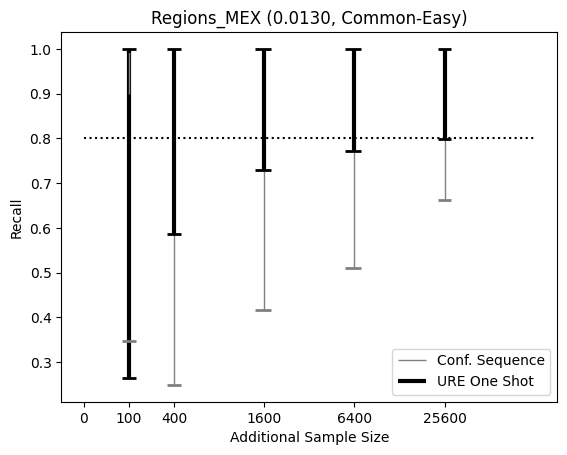

In [95]:
#One-sided interval graph

# importing the modules
import matplotlib.pyplot as plt
import numpy as np
 
# specifying the plot size
fig, ax = plt.subplots()

ax.set_xticks((0,10,20,40,60,80))
ax.set_xticklabels((0,100,400,1600,6400,25600))

plt.xlabel("Additional Sample Size")
plt.ylabel("Recall")

#WSR Method UOSCI
plt.vlines(10, Samp100mets['UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(20, Samp400mets['UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(40, Samp1600mets['UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(60, Samp6400mets['UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(80, Samp25600mets['UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="gray", linewidth = 1)


#One-Shot URE UOSCI
plt.vlines(10, URESamp100mets['URE_UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(20, URESamp400mets['URE_UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(40, URESamp1600mets['URE_UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(60, URESamp6400mets['URE_UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(80, URESamp25600mets['URE_UOSCI_RECALL-lower'], 1, linestyles ="solid", colors ="k", linewidth = 3)

#80% recall marker
plt.hlines(y=.80, xmin=0, xmax=100, linestyles = "dotted", colors = 'k')

#upper conf int cap
plt.hlines(y=1, xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=1, xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=1, xmin=38, xmax=41.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=1, xmin=58, xmax=61.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=1, xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'k', linewidth = 2)

#WSR lower conf int cap
plt.hlines(y=Samp100mets['UOSCI_RECALL-lower'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp400mets['UOSCI_RECALL-lower'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp1600mets['UOSCI_RECALL-lower'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp6400mets['UOSCI_RECALL-lower'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp25600mets['UOSCI_RECALL-lower'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'gray', linewidth = 2)

#URE lower conf int cap
plt.hlines(y=URESamp100mets['URE_UOSCI_RECALL-lower'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp400mets['URE_UOSCI_RECALL-lower'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp1600mets['URE_UOSCI_RECALL-lower'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp6400mets['URE_UOSCI_RECALL-lower'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp25600mets['URE_UOSCI_RECALL-lower'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'k', linewidth = 2)

line1 = plt.vlines(10, .9, 1, linestyles ="solid", colors ="gray", linewidth = 1)
line2 = plt.vlines(10, .99, 1, linestyles ="solid", colors ="k", linewidth = 3)

location = 0
legend_drawn_flag = True
plt.legend([line1, line2], ['Conf. Sequence', 'URE One Shot'], loc = 4)
plt.title("Regions_MEX (0.0130, Common-Easy)")
plt.savefig("one-sided regions_MEX.png")
# rendering plot
plt.show()

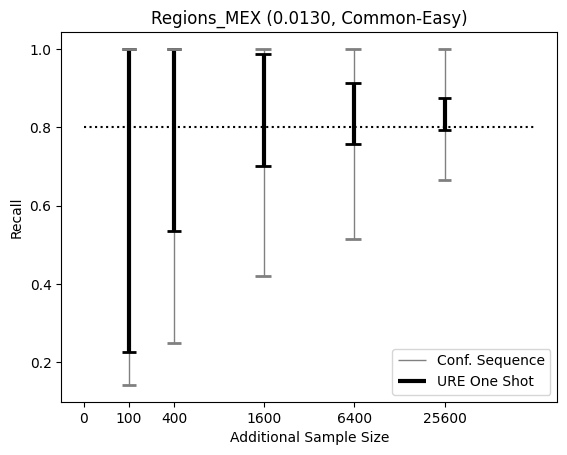

In [96]:
#Two sided interval graph

# importing the modules
import matplotlib.pyplot as plt
import numpy as np
 
# specifying the plot size
fig, ax = plt.subplots()

ax.set_xticks((0,10,20,40,60,80))
ax.set_xticklabels((0,100,400,1600,6400,25600))

plt.xlabel("Additional Sample Size")
plt.ylabel("Recall")

#WSR Method TSCI
plt.vlines(10, Samp100mets['TSCI_RECALL-lower'], Samp100mets['TSCI_RECALL-upper'], linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(20, Samp400mets['TSCI_RECALL-lower'], Samp400mets['TSCI_RECALL-upper'], linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(40, Samp1600mets['TSCI_RECALL-lower'], Samp1600mets['TSCI_RECALL-upper'], linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(60, Samp6400mets['TSCI_RECALL-lower'], Samp6400mets['TSCI_RECALL-upper'], linestyles ="solid", colors ="gray", linewidth = 1)
plt.vlines(80, Samp25600mets['TSCI_RECALL-lower'], Samp25600mets['TSCI_RECALL-upper'], linestyles ="solid", colors ="gray", linewidth = 1)


#One-Shot URE TSCI
plt.vlines(10, URESamp100mets['URE_TSCI_RECALL-lower'], URESamp100mets['URE_TSCI_RECALL-upper'], linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(20, URESamp400mets['URE_TSCI_RECALL-lower'], URESamp400mets['URE_TSCI_RECALL-upper'], linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(40, URESamp1600mets['URE_TSCI_RECALL-lower'], URESamp1600mets['URE_TSCI_RECALL-upper'], linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(60, URESamp6400mets['URE_TSCI_RECALL-lower'], URESamp6400mets['URE_TSCI_RECALL-upper'], linestyles ="solid", colors ="k", linewidth = 3)
plt.vlines(80, URESamp25600mets['URE_TSCI_RECALL-lower'], URESamp25600mets['URE_TSCI_RECALL-upper'], linestyles ="solid", colors ="k", linewidth = 3)

#80% recall marker
plt.hlines(y=.80, xmin=0, xmax=100, linestyles = "dotted", colors = 'k')

#upper URE conf int marker
plt.hlines(y=URESamp100mets['URE_TSCI_RECALL-upper'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp400mets['URE_TSCI_RECALL-upper'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp1600mets['URE_TSCI_RECALL-upper'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp6400mets['URE_TSCI_RECALL-upper'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp25600mets['URE_TSCI_RECALL-upper'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'k', linewidth = 2)

#lower URE conf int marker
plt.hlines(y=URESamp100mets['URE_TSCI_RECALL-lower'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp400mets['URE_TSCI_RECALL-lower'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp1600mets['URE_TSCI_RECALL-lower'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp6400mets['URE_TSCI_RECALL-lower'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'k', linewidth = 2)
plt.hlines(y=URESamp25600mets['URE_TSCI_RECALL-lower'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'k', linewidth = 2)

#upper WSR cont int marker
plt.hlines(y=Samp100mets['TSCI_RECALL-upper'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp400mets['TSCI_RECALL-upper'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp1600mets['TSCI_RECALL-upper'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp6400mets['TSCI_RECALL-upper'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp25600mets['TSCI_RECALL-upper'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'gray', linewidth = 2)

#lower WSR conf int marker
plt.hlines(y=Samp100mets['TSCI_RECALL-lower'], xmin=8.5, xmax=11.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp400mets['TSCI_RECALL-lower'], xmin=18.5, xmax=21.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp1600mets['TSCI_RECALL-lower'], xmin=38, xmax=41.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp6400mets['TSCI_RECALL-lower'], xmin=58, xmax=61.5, linestyles = "solid", colors = 'gray', linewidth = 2)
plt.hlines(y=Samp25600mets['TSCI_RECALL-lower'], xmin=78.5, xmax=81.5, linestyles = "solid", colors = 'gray', linewidth = 2)

# line1 = plt.vlines(10, .9, 1, linestyles ="solid", colors ="gray", linewidth = 1)
# line2 = plt.vlines(10, .99, 1, linestyles ="solid", colors ="k", linewidth = 3)

location = 0
legend_drawn_flag = True
plt.legend([line1, line2], ['Conf. Sequence', 'URE One Shot'], loc = 4)
plt.title("Regions_MEX (0.0130, Common-Easy)")
plt.savefig("two-sided regions_MEX.png")
# rendering plot
plt.show()